In [1]:
import openslide as ops
import pandas  as pd
import numpy   as np
import matplotlib.pyplot as plt
import os
import imageio
from fastprogress import progress_bar
from PIL import Image,ImageDraw,ImageEnhance,ImageColor 
import cv2
import copy
import scipy.ndimage as ndimage 
import random
import datetime
import json
import skimage.io as io
import pylab
import xmltodict
from decimal import Decimal, ROUND_HALF_UP
from shutil import copyfile
Image.MAX_IMAGE_PIXELS = 10000000000
def round_dec(n, d=2):
    s = '0.' + '0' * d
    return Decimal(str(n)).quantize(Decimal(s), rounding=ROUND_HALF_UP)

In [14]:
types = 5

for i_xml in range(0,22):

    print(r'./data/bad xml/' + str(types) + '/xml/' + str(types) + '_' + str(i_xml) + r'.xml')

./data/bad xml/5/xml/5_0.xml
./data/bad xml/5/xml/5_1.xml
./data/bad xml/5/xml/5_2.xml
./data/bad xml/5/xml/5_3.xml
./data/bad xml/5/xml/5_4.xml
./data/bad xml/5/xml/5_5.xml
./data/bad xml/5/xml/5_6.xml
./data/bad xml/5/xml/5_7.xml
./data/bad xml/5/xml/5_8.xml
./data/bad xml/5/xml/5_9.xml
./data/bad xml/5/xml/5_10.xml
./data/bad xml/5/xml/5_11.xml
./data/bad xml/5/xml/5_12.xml
./data/bad xml/5/xml/5_13.xml
./data/bad xml/5/xml/5_14.xml
./data/bad xml/5/xml/5_15.xml
./data/bad xml/5/xml/5_16.xml
./data/bad xml/5/xml/5_17.xml
./data/bad xml/5/xml/5_18.xml
./data/bad xml/5/xml/5_19.xml
./data/bad xml/5/xml/5_20.xml
./data/bad xml/5/xml/5_21.xml


In [13]:
types = 5

for i_xml in range(0,22):

    print(r'./data/' + str(types) + '/svs/' + str(types) + '_' + str(i_xml) + r'.xml')

./data/5/svs/5_0.xml
./data/5/svs/5_1.xml
./data/5/svs/5_2.xml
./data/5/svs/5_3.xml
./data/5/svs/5_4.xml
./data/5/svs/5_5.xml
./data/5/svs/5_6.xml
./data/5/svs/5_7.xml
./data/5/svs/5_8.xml
./data/5/svs/5_9.xml
./data/5/svs/5_10.xml
./data/5/svs/5_11.xml
./data/5/svs/5_12.xml
./data/5/svs/5_13.xml
./data/5/svs/5_14.xml
./data/5/svs/5_15.xml
./data/5/svs/5_16.xml
./data/5/svs/5_17.xml
./data/5/svs/5_18.xml
./data/5/svs/5_19.xml
./data/5/svs/5_20.xml
./data/5/svs/5_21.xml


In [16]:
allcontours = []

In [28]:
types = 1
allcontours = []
for i_xml in range(0,47):
# for i_xml in range(5,6):
    contours = []
    with open(r'./data/bad xml/' + str(types) + '/xml/' + str(types) + '_' + str(i_xml) + r'.xml') as fd:
        doc = xmltodict.parse(fd.read(), dict_constructor=dict)
        doc1 = copy.deepcopy(doc)
        
        if('Vertices' in doc1['Annotations']['Annotation']['Regions']['Region']):
            contours_temp = []
            obj2 = len(doc1['Annotations']['Annotation']['Regions']['Region']['Vertices']['Vertex'])-1
#             print(obj2)
            if(obj2>2):
                while(obj2 != -1):
                    bx1 = int(round_dec((doc1['Annotations']['Annotation']['Regions']['Region']['Vertices']['Vertex'][obj2]['@X']),0))
                    by1 = int(round_dec((doc1['Annotations']['Annotation']['Regions']['Region']['Vertices']['Vertex'][obj2]['@Y']),0))
            #         draw.rectangle([bx1,by1,bx2,by2], outline=(0,255,0))
                    contours_temp.append(bx1)
                    contours_temp.append(by1)
                    obj2-=1
#                     print(bx1,by1)
                contours.append(contours_temp)
        else:    
            obj = len(doc1['Annotations']['Annotation']['Regions']['Region'])-1
            while(obj != -1):
                contours_temp = []
                obj2 = len(doc1['Annotations']['Annotation']['Regions']['Region'][obj]['Vertices']['Vertex'])-1
    #             print(obj2)
                if(obj2>2):
                    while(obj2 != -1):
                        bx1 = int(round_dec((doc1['Annotations']['Annotation']['Regions']['Region'][obj]['Vertices']['Vertex'][obj2]['@X']),0))
                        by1 = int(round_dec((doc1['Annotations']['Annotation']['Regions']['Region'][obj]['Vertices']['Vertex'][obj2]['@Y']),0))
                #         draw.rectangle([bx1,by1,bx2,by2], outline=(0,255,0))
                        contours_temp.append(bx1)
                        contours_temp.append(by1)
                        obj2-=1
                    contours.append(contours_temp)
                obj-=1
    allcontours.append(contours)
np.save(r"./data/" + str(types) + "_bad",allcontours)

In [29]:
len(allcontours)

47

In [31]:
len(allcontours[0])

1

In [44]:
types = 7
temp_anno = np.load('./data/' + str(types) + '_bad.npy',allow_pickle=True)

for mask_id in progress_bar(range(0,len(temp_anno))):
    
    tif = ops.open_slide(r'./data/' + str(types) + '/svs/' + str(types) + '_' + str(mask_id) + r'.svs')

    temp_cord = copy.deepcopy(temp_anno[mask_id])

    x, y = tif.dimensions[1],tif.dimensions[0]
    
    temp_mask = np.zeros((x,y), dtype = np.uint8)
    image_draw = Image.fromarray(temp_mask)
    # image_draw = Image.fromarray(np.asarray(test_img[r_in,:,:,0], dtype = np.uint8)).convert('RGB')


    draw = ImageDraw.Draw(image_draw)
    for annos in temp_cord:
        draw.polygon(annos,  outline="white", fill="white" )
#         print(annos)

    image_draw.save('./data/badmask/' + str(types) + '/' + str(mask_id) + '.png')
            

In [50]:
for i_xml in range(0,47):
# for i_xml in range(5,6):
    
    print(r'./train/train/' + str(types) + '/svs/' + str(types) + '_' + str(i_xml) + r'.svs')

./train/train/7/svs/7_0.svs
./train/train/7/svs/7_1.svs
./train/train/7/svs/7_2.svs
./train/train/7/svs/7_3.svs
./train/train/7/svs/7_4.svs
./train/train/7/svs/7_5.svs
./train/train/7/svs/7_6.svs
./train/train/7/svs/7_7.svs
./train/train/7/svs/7_8.svs
./train/train/7/svs/7_9.svs
./train/train/7/svs/7_10.svs
./train/train/7/svs/7_11.svs
./train/train/7/svs/7_12.svs
./train/train/7/svs/7_13.svs
./train/train/7/svs/7_14.svs
./train/train/7/svs/7_15.svs
./train/train/7/svs/7_16.svs
./train/train/7/svs/7_17.svs
./train/train/7/svs/7_18.svs
./train/train/7/svs/7_19.svs
./train/train/7/svs/7_20.svs
./train/train/7/svs/7_21.svs
./train/train/7/svs/7_22.svs
./train/train/7/svs/7_23.svs
./train/train/7/svs/7_24.svs
./train/train/7/svs/7_25.svs
./train/train/7/svs/7_26.svs
./train/train/7/svs/7_27.svs
./train/train/7/svs/7_28.svs
./train/train/7/svs/7_29.svs
./train/train/7/svs/7_30.svs
./train/train/7/svs/7_31.svs
./train/train/7/svs/7_32.svs
./train/train/7/svs/7_33.svs
./train/train/7/svs/7_34

In [60]:
types = 1
for i_xml in range(0,100):
# for i_xml in range(5,6):
    contours = []
    if(os.path.exists(r'./train/train/' + str(types) + '/good/' + str(types) + '_' + str(i_xml) + r'.xml')==True and os.path.exists(r'./train/train/' + str(types) + '/svs/' + str(types) + '_' + str(i_xml) + r'.svs')==True):
        with open(r'./train/train/' + str(types) + '/good/' + str(types) + '_' + str(i_xml) + r'.xml') as fd:
            doc = xmltodict.parse(fd.read(), dict_constructor=dict)
            doc1 = copy.deepcopy(doc)

            if("Coordinates" in doc1['ASAP_Annotations']['Annotations']['Annotation']):
                contours_temp = []
                obj2 = len(doc1['ASAP_Annotations']['Annotations']['Annotation']['Coordinates']['Coordinate'])-1
    #             print(obj2)
                if(obj2>2):
                    while(obj2 != -1):
                        bx1 = int(round_dec((doc1['ASAP_Annotations']['Annotations']['Annotation']['Coordinates']['Coordinate'][obj2]['@X']),0))
                        by1 = int(round_dec((doc1['ASAP_Annotations']['Annotations']['Annotation']['Coordinates']['Coordinate'][obj2]['@Y']),0))
                #         draw.rectangle([bx1,by1,bx2,by2], outline=(0,255,0))
                        contours_temp.append(bx1)
                        contours_temp.append(by1)
                        obj2-=1
    #                     print(bx1,by1)
                    contours.append(contours_temp)

            else:        
                obj = len(doc1['ASAP_Annotations']['Annotations']['Annotation'])-1
        #         print(obj)

                while(obj != -1):
                    contours_temp = []
                    obj2 = len(doc1['ASAP_Annotations']['Annotations']['Annotation'][obj]['Coordinates']['Coordinate'])-1
        #             print(obj2)
                    if(obj2>2):
                        while(obj2 != -1):
                            bx1 = int(round_dec((doc1['ASAP_Annotations']['Annotations']['Annotation'][obj]['Coordinates']['Coordinate'][obj2]['@X']),0))
                            by1 = int(round_dec((doc1['ASAP_Annotations']['Annotations']['Annotation'][obj]['Coordinates']['Coordinate'][obj2]['@Y']),0))
                    #         draw.rectangle([bx1,by1,bx2,by2], outline=(0,255,0))
                            contours_temp.append(bx1)
                            contours_temp.append(by1)
                            obj2-=1
                        contours.append(contours_temp)
                    obj-=1
        
#         allcontours.append(contours)


        tif = ops.open_slide(r'./train/train/' + str(types) + '/svs/' + str(types) + '_' + str(i_xml) + r'.svs')

        temp_cord = copy.deepcopy(contours)

        x, y = tif.dimensions[1],tif.dimensions[0]

        temp_mask = np.zeros((x,y), dtype = np.uint8)
        image_draw = Image.fromarray(temp_mask)
        # image_draw = Image.fromarray(np.asarray(test_img[r_in,:,:,0], dtype = np.uint8)).convert('RGB')


        draw = ImageDraw.Draw(image_draw)
        for annos in temp_cord:
            draw.polygon(annos,  outline="white", fill="white" )
    #         print(annos)

        image_draw.save(r'./train/train/' + str(types) + '/svs/' + str(types) + '_' + str(i_xml) + r'_good.png')


In [58]:
types = 1
for i_xml in range(0,100):
# for i_xml in range(5,6):
    contours = []
    if(os.path.exists(r'./train/train/' + str(types) + '/bad/' + str(types) + '_' + str(i_xml) + r'.xml')==True and os.path.exists(r'./train/train/' + str(types) + '/svs/' + str(types) + '_' + str(i_xml) + r'.svs')==True):
        with open(r'./train/train/' + str(types) + '/bad/' + str(types) + '_' + str(i_xml) + r'.xml') as fd:
            doc = xmltodict.parse(fd.read(), dict_constructor=dict)
            doc1 = copy.deepcopy(doc)

            if('Vertices' in doc1['Annotations']['Annotation']['Regions']['Region']):
                contours_temp = []
                obj2 = len(doc1['Annotations']['Annotation']['Regions']['Region']['Vertices']['Vertex'])-1
    #             print(obj2)
                if(obj2>2):
                    while(obj2 != -1):
                        bx1 = int(round_dec((doc1['Annotations']['Annotation']['Regions']['Region']['Vertices']['Vertex'][obj2]['@X']),0))
                        by1 = int(round_dec((doc1['Annotations']['Annotation']['Regions']['Region']['Vertices']['Vertex'][obj2]['@Y']),0))
                #         draw.rectangle([bx1,by1,bx2,by2], outline=(0,255,0))
                        contours_temp.append(bx1)
                        contours_temp.append(by1)
                        obj2-=1
    #                     print(bx1,by1)
                    contours.append(contours_temp)
            else:    
                obj = len(doc1['Annotations']['Annotation']['Regions']['Region'])-1
                while(obj != -1):
                    contours_temp = []
                    obj2 = len(doc1['Annotations']['Annotation']['Regions']['Region'][obj]['Vertices']['Vertex'])-1
        #             print(obj2)
                    if(obj2>2):
                        while(obj2 != -1):
                            bx1 = int(round_dec((doc1['Annotations']['Annotation']['Regions']['Region'][obj]['Vertices']['Vertex'][obj2]['@X']),0))
                            by1 = int(round_dec((doc1['Annotations']['Annotation']['Regions']['Region'][obj]['Vertices']['Vertex'][obj2]['@Y']),0))
                    #         draw.rectangle([bx1,by1,bx2,by2], outline=(0,255,0))
                            contours_temp.append(bx1)
                            contours_temp.append(by1)
                            obj2-=1
                        contours.append(contours_temp)
                    obj-=1
#         allcontours.append(contours)
    # np.save(r"./data/" + str(types) + "_bad",allcontours)


        tif = ops.open_slide(r'./train/train/' + str(types) + '/svs/' + str(types) + '_' + str(i_xml) + r'.svs')

        temp_cord = copy.deepcopy(contours)

        x, y = tif.dimensions[1],tif.dimensions[0]

        temp_mask = np.zeros((x,y), dtype = np.uint8)
        image_draw = Image.fromarray(temp_mask)
        # image_draw = Image.fromarray(np.asarray(test_img[r_in,:,:,0], dtype = np.uint8)).convert('RGB')


        draw = ImageDraw.Draw(image_draw)
        for annos in temp_cord:
            draw.polygon(annos,  outline="white", fill="white" )
    #         print(annos)

        image_draw.save(r'./train/train/' + str(types) + '/svs/' + str(types) + '_' + str(i_xml) + r'_bad.png')


In [59]:
types = 1
for i_xml in range(0,100):
# for i_xml in range(5,6):
    contours = []
    if(os.path.exists(r'./train/test/' + str(types) + '/bad/' + str(types) + '_' + str(i_xml) + r'.xml')==True and os.path.exists(r'./train/test/' + str(types) + '/svs/' + str(types) + '_' + str(i_xml) + r'.svs')==True):
        with open(r'./train/test/' + str(types) + '/bad/' + str(types) + '_' + str(i_xml) + r'.xml') as fd:
            doc = xmltodict.parse(fd.read(), dict_constructor=dict)
            doc1 = copy.deepcopy(doc)

            if('Vertices' in doc1['Annotations']['Annotation']['Regions']['Region']):
                contours_temp = []
                obj2 = len(doc1['Annotations']['Annotation']['Regions']['Region']['Vertices']['Vertex'])-1
    #             print(obj2)
                if(obj2>2):
                    while(obj2 != -1):
                        bx1 = int(round_dec((doc1['Annotations']['Annotation']['Regions']['Region']['Vertices']['Vertex'][obj2]['@X']),0))
                        by1 = int(round_dec((doc1['Annotations']['Annotation']['Regions']['Region']['Vertices']['Vertex'][obj2]['@Y']),0))
                #         draw.rectangle([bx1,by1,bx2,by2], outline=(0,255,0))
                        contours_temp.append(bx1)
                        contours_temp.append(by1)
                        obj2-=1
    #                     print(bx1,by1)
                    contours.append(contours_temp)
            else:    
                obj = len(doc1['Annotations']['Annotation']['Regions']['Region'])-1
                while(obj != -1):
                    contours_temp = []
                    obj2 = len(doc1['Annotations']['Annotation']['Regions']['Region'][obj]['Vertices']['Vertex'])-1
        #             print(obj2)
                    if(obj2>2):
                        while(obj2 != -1):
                            bx1 = int(round_dec((doc1['Annotations']['Annotation']['Regions']['Region'][obj]['Vertices']['Vertex'][obj2]['@X']),0))
                            by1 = int(round_dec((doc1['Annotations']['Annotation']['Regions']['Region'][obj]['Vertices']['Vertex'][obj2]['@Y']),0))
                    #         draw.rectangle([bx1,by1,bx2,by2], outline=(0,255,0))
                            contours_temp.append(bx1)
                            contours_temp.append(by1)
                            obj2-=1
                        contours.append(contours_temp)
                    obj-=1
#         allcontours.append(contours)
    # np.save(r"./data/" + str(types) + "_bad",allcontours)


        tif = ops.open_slide(r'./train/test/' + str(types) + '/svs/' + str(types) + '_' + str(i_xml) + r'.svs')

        temp_cord = copy.deepcopy(contours)

        x, y = tif.dimensions[1],tif.dimensions[0]

        temp_mask = np.zeros((x,y), dtype = np.uint8)
        image_draw = Image.fromarray(temp_mask)
        # image_draw = Image.fromarray(np.asarray(test_img[r_in,:,:,0], dtype = np.uint8)).convert('RGB')


        draw = ImageDraw.Draw(image_draw)
        for annos in temp_cord:
            draw.polygon(annos,  outline="white", fill="white" )
    #         print(annos)

        image_draw.save(r'./train/test/' + str(types) + '/svs/' + str(types) + '_' + str(i_xml) + r'_bad.png')


In [82]:
patch_size = 512
# overlap = 0

sqr_patch_size = patch_size * patch_size
thres_blank =  int(0.1 * patch_size * patch_size)
thres_tumor =  int(0.1 * patch_size * patch_size)
thres_blank2 = int(0.5 * patch_size * patch_size)

image_id = 1
count_frequency = 1

for types in [1]:
    for mask_id in progress_bar(range(0,100)):
        if(os.path.exists(r'./train/train/' + str(types) + '/bad/' + str(types) + '_' + str(mask_id) + r'.xml')==True and os.path.exists(r'./train/train/' + str(types) + '/svs/' + str(types) + '_' + str(mask_id) + r'.svs')==True):
            
            tif = ops.open_slide(r'./train/train/' + str(types) + '/svs/' + str(types) + '_' + str(mask_id) + r'.svs')

            god_img_mask = copy.deepcopy(np.asarray(Image.open(r'./train/train/' + str(types) + '/svs/' + str(types) + '_' + str(mask_id) + r'_good.png')))
            bad_img_mask = copy.deepcopy(np.asarray(Image.open(r'./train/train/' + str(types) + '/svs/' + str(types) + '_' + str(mask_id) + r'_bad.png')))


#             total_size = tif.dimensions
            total_size = bad_img_mask.shape[1],bad_img_mask.shape[0]

            for x in progress_bar(range(0,total_size[0]-patch_size, patch_size)):
                for y in range(0,total_size[1]-patch_size, patch_size):


                    bad_img_mask_temp = copy.deepcopy(bad_img_mask[y:y+patch_size,x:x+patch_size])
                    god_img_mask_temp = copy.deepcopy(god_img_mask[y:y+patch_size,x:x+patch_size])
                    
                    bad_img_type = np.sum(bad_img_mask_temp>10)
                    god_img_type = np.sum(god_img_mask_temp>10)
                    
                    if(bad_img_type > thres_tumor):
                        #属于肿瘤

                        patch_temp = np.asarray(tif.read_region((x,y),0,(patch_size,patch_size)))[:,:,:3]
                        arraysum = np.sum(patch_temp, axis=2)
                        temp_arraysum = copy.deepcopy(arraysum)
                        patch_nonwhite = np.sum(arraysum<550)

                        if(patch_nonwhite >thres_blank):
                            
                            temp_arraysum[temp_arraysum>550]  = 0
                            temp_arraysum[temp_arraysum!=0]  = 1
                            bad_img_mask_temp = bad_img_mask_temp*temp_arraysum
                            positive_non_white = np.sum(bad_img_mask_temp>10)
                            positive_ratio = round(positive_non_white/sqr_patch_size,5)
                            
                            if(god_img_type >thres_tumor):
                                god_img_label = 1
                            else:
                                god_img_label = 0
                            
                            Image.fromarray(patch_temp).resize((256,256)).save(r'./train/patch' + str(patch_size) + '/' + str(types) + '_' + str(mask_id) + '_%07d_'%(image_id) + '1_' + str(positive_ratio) + '_' + str(god_img_label) + '.png' )

                            image_id+=1
#                             count_frequency+=1

                    if(bad_img_type < 3 ):

                        patch_temp = np.asarray(tif.read_region((x,y),0,(patch_size,patch_size)))[:,:,:3]
                        arraysum = np.sum(patch_temp, axis=2)
                        god_img_mask_temp = copy.deepcopy(god_img_mask[y:y+patch_size,x:x+patch_size])
                        god_img_type = np.sum(god_img_mask_temp>10)
                        #判断黑色面积
                        patch_black = np.sum(arraysum<5) + np.sum(arraysum>550)

                        if(patch_black < thres_blank2):
#                             count_frequency += 1
#                             if(count_frequency%5000 == 0 ):
#                                 patch_nonwhite = 200000

#                         if(patch_nonwhite < thres_blank2):
        
                            if(god_img_type >thres_tumor):
                                god_img_label = 1
                            else:
                                god_img_label = 0
                                
                            Image.fromarray(patch_temp).resize((256,256)).save(r'./train/patch' + str(patch_size) + '/' + str(types) + '_' + str(mask_id) + '_%07d_'%(image_id) + '0_0_' + str(god_img_label) + '.png' )
    #                             print((r'/home/q/3t/patches/patch/' + str(dataset) + '_%07d_10'%(image_id) + '0000000000' + '.bmp' ), patch_black)

                            image_id+=1



In [66]:
'./train/train/' + str(types) + '/svs/' + str(types) + '_' + str(mask_id) + r'_good.png'

'./train/train/1/svs/1_4_good.png'

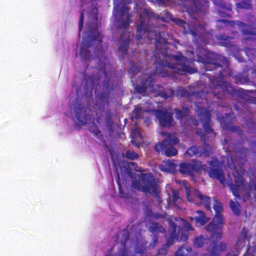

In [79]:
Image.fromarray(patch_temp).resize((256,256))